# Data-set Import

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/supunsathsara/NIBM-ML-data-sets/main/output-cleaned.csv')
df

,gpa,Introduction to Computer Science,Mathematics for Computing,Programming Fundamentals,Fundamentals of Electronics,result
0,3.69,4.3,3.3,4.0,4.0,PASS
1,1.30,2.7,1.7,0.0,0.0,FAIL
2,0.00,0.0,0.0,0.0,0.0,FAIL
3,2.70,4.0,4.0,3.0,4.0,FAIL
4,2.98,3.7,2.7,4.0,3.3,FAIL
5,3.04,4.0,4.0,2.7,4.0,FAIL
6,3.25,4.0,4.0,3.3,4.0,FAIL
7,0.00,0.0,0.0,0.0,0.0,FAIL
8,2.03,3.0,3.3,0.0,3.7,FAIL
9,3.53,4.0,4.3,3.0,3.7,PASS


# Pass/Fail Predict Model

## Extracting Target and Features
In this section, we prepare our dataset for machine learning by defining our target variable (y) and feature variables (x).

In [ ]:
y = df["result"]
x = df.drop(columns=['gpa', 'result'])
y

0     PASS
1     FAIL
2     FAIL
3     FAIL
4     FAIL
5     FAIL
6     FAIL
7     FAIL
8     FAIL
9     PASS
10    FAIL
11    FAIL
12    FAIL
13    PASS
14    PASS
15    FAIL
16    FAIL
17    FAIL
18    FAIL
19    FAIL
20    FAIL
21    FAIL
22    FAIL
23    FAIL
24    FAIL
25    FAIL
26    FAIL
27    FAIL
28    FAIL
29    FAIL
30    FAIL
31    FAIL
32    PASS
33    FAIL
34    FAIL
35    FAIL
36    PASS
37    FAIL
38    FAIL
39    PASS
40    PASS
41    FAIL
42    FAIL
Name: result, dtype: object

## Training the Decision Tree
we train our Decision Tree classifier. Harnessing the power of the sklearn library, we split our dataset into a training set (80%) and a testing set (20%). With the wisdom of randomness (random_state=42)


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7777777777777778


## Model Evaluation

Accuracy: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

        FAIL       1.00      0.71      0.83         7
        PASS       0.50      1.00      0.67         2

    accuracy                           0.78         9
   macro avg       0.75      0.86      0.75         9
weighted avg       0.89      0.78      0.80         9

Confusion Matrix:
 [[5 2]
 [0 2]]


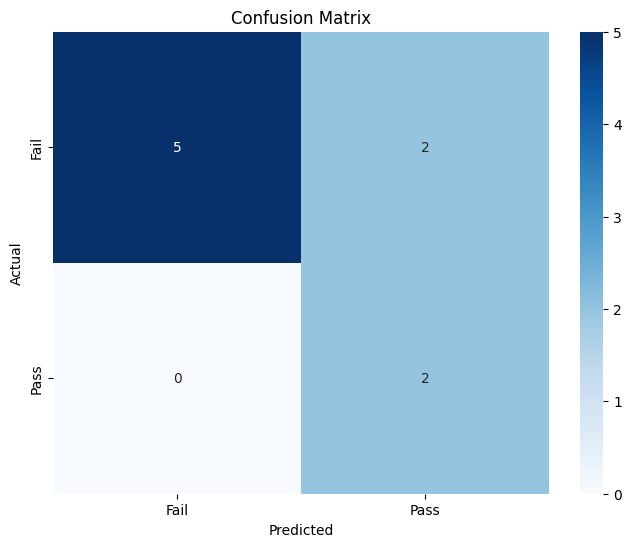

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Predicting using the model

In [ ]:
# Load the input data into a DataFrame with feature names
feature_names = ['Introduction to Computer Science', 'Mathematics for Computing', 'Programming Fundamentals', 'Fundamentals of Electronics']
input_data = pd.DataFrame({
    'Introduction to Computer Science': [4],
    'Mathematics for Computing': [3],
    'Programming Fundamentals': [4],
    'Fundamentals of Electronics': [2]
}, columns=feature_names)

predictions = clf.predict(input_data)
predictions

array(['FAIL'], dtype=object)

## Summery

**Accuracy: 0.78**

> Our model correctly predicted the outcome 78% of the time. Think of it as hitting the target almost 8 out of 10 times.
Classification Report:

**Precision (for PASS): 50%**



> When our model predicts a PASS, it's correct 50% of the time. This is like saying it's a bit cautious but still gets it right sometimes.

**Recall (for PASS): 100%**

> Explanation: Out of all the actual PASS outcomes, our model captured every single one. It's like not letting any PASS slip away.

**F1-score (for PASS): 67%**

> Combining precision and recall, this score indicates overall performance. Think of it as a balanced measure, striving for precision and not missing out on PASS outcomes.

**Weighted Average F1-score: 80%**

> Taking into account both PASS and FAIL, the model shows an overall balanced performance with an 80% score. It's like maintaining a good balance in accuracy across different outcomes.

In simpler terms, our model is pretty good at catching PASS instances but may need a bit more confidence in its predictions. Overall, it's doing well with an 80% balanced performance.

# GPA Predict Model

## Extracting Target and Features
In this section, we prepare our dataset for machine learning by defining our target variable (y) and feature variables (x).

In [ ]:
yr = df['gpa']
Xr = df.drop(columns=['gpa', 'result'])


## Training the Model

**Splitting data into train and test sets**

In [ ]:
from sklearn.model_selection import train_test_split

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)


**Training the model using Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
regressor = LinearRegression()

# Train the model
regressor.fit(Xr_train, yr_train)

# Make predictions
predictions = regressor.predict(Xr_test)


## Evaluate the Model

Root Mean Squared Error: 0.19064710161491777
R-squared (R2) Score: 0.9666561143085379
Explained Variance Score: 0.9749299556357868




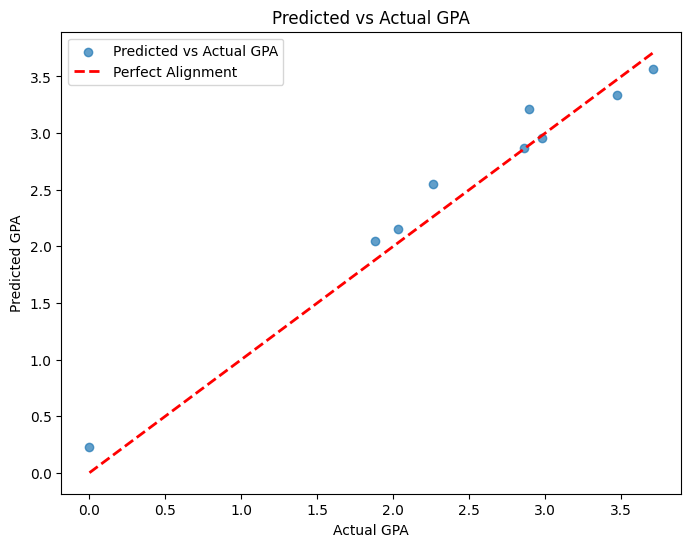

In [ ]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt

# Calculate and print RMSE
mse = mean_squared_error(yr_test, predictions)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

# Calculate and print R-squared (R2) score
r2 = r2_score(yr_test, predictions)
print("R-squared (R2) Score:", r2)

# Calculate and print Explained Variance Score
explained_variance = explained_variance_score(yr_test, predictions)
print("Explained Variance Score:", explained_variance)

print()
print()
# Plot predicted vs actual values with a line representing perfect alignment
plt.figure(figsize=(8, 6))
plt.scatter(yr_test, predictions, alpha=0.7, label='Predicted vs Actual GPA')
plt.plot([min(yr_test), max(yr_test)], [min(yr_test), max(yr_test)], color='red', linestyle='--', linewidth=2, label='Perfect Alignment')
plt.title('Predicted vs Actual GPA')
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.legend()
plt.show()

## Predicting the GPA using the model

In [ ]:
# Sample test data for prediction
test_data = pd.DataFrame({
    'Introduction to Computer Science': [3],
    'Mathematics for Computing': [4.3],
    'Programming Fundamentals': [2],
    'Fundamentals of Electronics': [3]
})

# Use the trained regression model to make predictions
predicted_gpa = regressor.predict(test_data)

print("Predicted GPA:", predicted_gpa[0])


Predicted GPA: 2.7351101880829654
